In [ ]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [ ]:
data_CSV = './sample_data/Dataset Pekerjaan - Job Seeker.csv'

# cek data csv
with open(data_CSV, 'r') as csvfile:
    print(f"Header looks like this:\n\n{csvfile.readline()}")
    print(f"First data point looks like this:\n\n{csvfile.readline()}")
    print(f"Second data point looks like this:\n\n{csvfile.readline()}")

Header looks like this:

ID,Bidang Pekerjaan,Deskripsi Diri

First data point looks like this:

1,Pelayanan,Saya memiliki pengalaman dalam membersihkan dan merapikan kamar tamu serta area umum hotel.

Second data point looks like this:

2,Pelayanan,Saya memiliki pengalaman dalam membantu dalam proses pembuatan dan formulasi produk roti dan kue.



##Parameter

In [ ]:
NUM_WORDS = 1000
EMBEDDING_DIM = 16
MAXLEN = 120
PADDING = 'post'
OOV_TOKEN = "<OOV>"
TRAINING_SPLIT = .8

##Persiapan Data

In [ ]:
def remove_stopwords(sentence):
    # List of stopwords
    stopwords = ["yang", "untuk", "pada", "ke", "para", "namun", "menurut", "antara", "dia", "dua", "ia", "seperti", "jika", "sehingga", "kembali", "dan", "tidak", "ini", "karena", "kepada", "oleh", "saat", "harus", "sementara", "setelah", "belum", "kami", "sekitar", "bagi", "serta", "di", "dari", "telah", "sebagai", "masih", "hal", "ketika", "adalah", "itu", "dalam", "bisa", "bahwa", "atau", "hanya", "kita", "dengan", "akan", "juga", "ada", "mereka", "sudah", "saya", "terhadap", "secara", "agar", "lain", "anda", "begitu", "mengapa", "kenapa", "yaitu", "yakni", "daripada", "itulah", "lagi", "maka", "tentang", "demi", "dimana", "kemana", "pula", "sambil", "sebelum", "sesudah", "supaya", "guna", "kah", "pun", "sampai", "sedangkan", "selagi", "sementara", "tetapi", "apakah", "kecuali", "sebab", "selain", "seolah", "seraya", "seterusnya", "tanpa", "agak", "boleh", "dapat", "dsb", "dst", "dll", "dahulu", "dulunya", "anu", "demikian", "tapi", "ingin", "juga", "nggak", "mari", "nanti", "melainkan", "oh", "ok", "seharusnya", "sebetulnya", "setiap", "setidaknya", "sesuatu", "pasti", "saja", "toh", "ya", "walau", "tolong ", "tentu", "amat", "apalagi", "bagaimanapun", "dengan", "ia", "bahwa", "oleh"]
    # Sentence converted to lowercase-only
    sentence = sentence.lower()

    words = sentence.split()
    no_words = [w for w in words if w not in stopwords]
    sentence = " ".join(no_words)

    return sentence


def parse_data_from_file(filename):
    sentences = []
    labels = []
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        next(reader)
        for row in reader:
            labels.append(row[1])
            sentence = row[2]
            sentence = remove_stopwords(sentence)
            sentences.append(sentence)

    return sentences, labels

In [ ]:
# Test the functions
sentences, labels = parse_data_from_file("./sample_data/Dataset Pekerjaan - Job Seeker.csv")

print(f"There are {len(sentences)} sentences in the dataset.\n")
print(f"First sentence has {len(sentences[0].split())} words (after removing stopwords).\n")
print(f"There are {len(labels)} labels in the dataset.\n")
print(f"The first 5 labels are {labels[:5]}")

There are 163 sentences in the dataset.

First sentence has 9 words (after removing stopwords).

There are 163 labels in the dataset.

The first 5 labels are ['Pelayanan', 'Pelayanan', 'Logistik', 'Penjualan', 'Pendidikan']


##Split Data

In [ ]:
def train_val_split(sentences, labels, training_split):
    # Compute the number of sentences that will be used for training (should be an integer)
    train_size = int(len(sentences)*training_split)

    # Split the sentences and labels into train/validation splits
    train_sentences = sentences[:train_size]
    train_labels = labels[:train_size]

    validation_sentences = sentences[train_size:]
    validation_labels = labels[train_size:]

    ### END CODE HERE

    return train_sentences, validation_sentences, train_labels, validation_labels

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_val_split(sentences, labels, TRAINING_SPLIT)

print(f"There are {len(train_sentences)} sentences for training.\n")
print(f"There are {len(train_labels)} labels for training.\n")
print(f"There are {len(val_sentences)} sentences for validation.\n")
print(f"There are {len(val_labels)} labels for validation.")

There are 130 sentences for training.

There are 130 labels for training.

There are 33 sentences for validation.

There are 33 labels for validation.


##Tokenizer

In [ ]:
def fit_tokenizer(train_sentences, num_words, oov_token):
    # Instantiate the Tokenizer class, passing in the correct values for num_words and oov_token
    tokenizer = Tokenizer(num_words = num_words, oov_token=oov_token)

    # Fit the tokenizer to the training sentences
    tokenizer.fit_on_texts(train_sentences)

    return tokenizer

In [ ]:
# Test your function
tokenizer = fit_tokenizer(train_sentences, NUM_WORDS, OOV_TOKEN)
word_index = tokenizer.word_index

print(f"Vocabulary contains {len(word_index)} words\n")
print("<OOV> token included in vocabulary" if "<OOV>" in word_index else "<OOV> token NOT included in vocabulary")

Vocabulary contains 416 words

<OOV> token included in vocabulary


##Sequence dan Padding data

In [ ]:
def seq_and_pad(sentences, tokenizer, padding, maxlen):
    # Convert sentences to sequences
    sequences = tokenizer.texts_to_sequences(sentences)

    # Pad the sequences using the correct padding and maxlen
    padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding=padding)

    return padded_sequences

In [ ]:
# Test your function
train_padded_seq = seq_and_pad(train_sentences, tokenizer, PADDING, MAXLEN)
val_padded_seq = seq_and_pad(val_sentences, tokenizer, PADDING, MAXLEN)

print(f"Padded training sequences have shape: {train_padded_seq.shape}\n")
print(f"Padded validation sequences have shape: {val_padded_seq.shape}")

Padded training sequences have shape: (130, 120)

Padded validation sequences have shape: (33, 120)


##Memberi Token pada Label

In [ ]:
def tokenize_labels(all_labels, split_labels):
    # Instantiate the Tokenizer (no additional arguments needed)
    label_tokenizer = Tokenizer()

    # Fit the tokenizer on all the labels
    label_tokenizer.fit_on_texts(all_labels)

    # Convert labels to sequences
    label_seq = label_tokenizer.texts_to_sequences(split_labels)

    # Convert sequences to a numpy array. Don't forget to substact 1 from every entry in the array!
    label_seq_np = np.array(label_seq) - 1

    return label_seq_np

In [ ]:
# Test your function
train_label_seq = tokenize_labels(labels, train_labels)
val_label_seq = tokenize_labels(labels, val_labels)

print(f"First 5 labels of the training set should look like this:\n{train_label_seq[:5]}\n")
print(f"First 5 labels of the validation set should look like this:\n{val_label_seq[:5]}\n")
print(f"Tokenized labels of the training set have shape: {train_label_seq.shape}\n")
print(f"Tokenized labels of the validation set have shape: {val_label_seq.shape}\n")

First 5 labels of the training set should look like this:
[[ 0]
 [ 0]
 [ 1]
 [10]
 [ 2]]

First 5 labels of the validation set should look like this:
[[ 8]
 [ 2]
 [ 6]
 [ 0]
 [10]]

Tokenized labels of the training set have shape: (130, 1)

Tokenized labels of the validation set have shape: (33, 1)



##Function Model

In [ ]:
def create_model(num_words, embedding_dim, maxlen):

    tf.random.set_seed(123)

    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(num_words, embedding_dim, input_length=maxlen),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [ ]:
model = create_model(NUM_WORDS, EMBEDDING_DIM, MAXLEN)

history = model.fit(train_padded_seq, train_label_seq, epochs=30, validation_data=(val_padded_seq, val_label_seq))

Epoch 1/30
5/5 [==============================] - 6s 205ms/step - loss: nan - accuracy: 0.2538 - val_loss: nan - val_accuracy: 0.3333
Epoch 2/30
5/5 [==============================] - 1s 126ms/step - loss: nan - accuracy: 0.3000 - val_loss: nan - val_accuracy: 0.3333
Epoch 3/30
5/5 [==============================] - 1s 157ms/step - loss: nan - accuracy: 0.3000 - val_loss: nan - val_accuracy: 0.3333
Epoch 4/30
5/5 [==============================] - 1s 86ms/step - loss: nan - accuracy: 0.3000 - val_loss: nan - val_accuracy: 0.3333
Epoch 5/30
5/5 [==============================] - 1s 124ms/step - loss: nan - accuracy: 0.3000 - val_loss: nan - val_accuracy: 0.3333
Epoch 6/30
5/5 [==============================] - 0s 47ms/step - loss: nan - accuracy: 0.3000 - val_loss: nan - val_accuracy: 0.3333
Epoch 7/30
5/5 [==============================] - 0s 86ms/step - loss: nan - accuracy: 0.3000 - val_loss: nan - val_accuracy: 0.3333
Epoch 8/30
5/5 [==============================] - 0s 121ms/step -

#Visualisasi Training

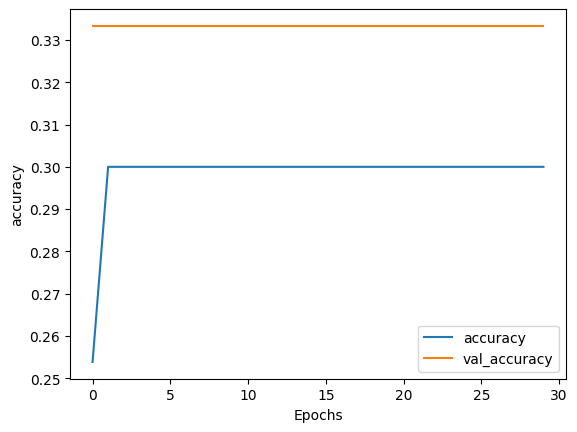

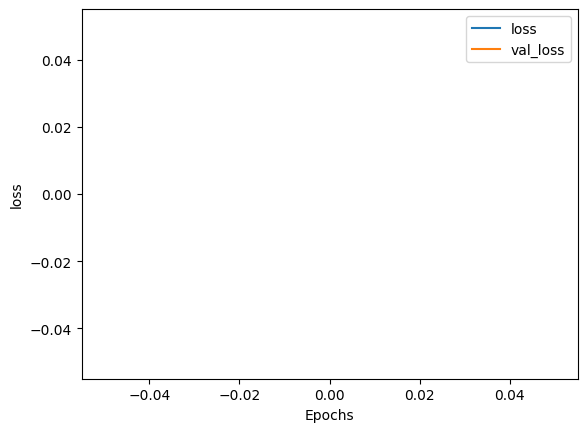

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")